# TTT4185 Machine learning for Speech technology

## Computer assigment 3a: Classification using Deep Neural Networks

This assignment assumes that the student has reviewed the material on deep neural networks.

In this assignment we will use the high level `Keras` framework together with `Tensorflow` to perform some deep learning experiments.

We will be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition, the speaker ID and the gender of the speaker are given for each phoneme.

The first few cells of this notebook contain example code to load and extract data, setup a simple network and train a deep neural network for classification. 

Note that we do not have a test dataset, but only training and validation sets. We do some experiments on the training set and observe the effect on the validation set.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

2023-10-24 20:12:40.313494: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Load data from CSV files 
rawtrain = pd.read_csv("Train(6).csv")
rawvalid = pd.read_csv("Validation(2).csv")

# Take a peek at the raw data
rawtrain.head(10)

,SpeakerID,Gender,Phoneme,F1,F2,F3,F4,B1,B2,B3,B4
0,cjf0,F,h#,0.701982,2.125440,2.433528,3.530050,0.264459,0.326273,0.300301,0.410096
1,cjf0,F,q,0.340942,2.594934,2.788244,4.028250,0.282159,0.471724,0.310578,0.505835
2,cjf0,F,iy,0.487078,2.605132,3.093409,4.354061,0.174520,0.340025,0.232818,0.413965
3,cjf0,F,v,0.505536,2.034326,2.804329,4.130655,0.190478,0.307295,0.301741,0.370238
4,cjf0,F,ih,0.524527,2.055382,2.989248,4.480000,0.164466,0.312337,0.301859,0.362134
5,cjf0,F,n,0.601591,2.046562,3.251497,4.561420,0.185757,0.334235,0.316704,0.381524
6,cjf0,F,eh,0.762154,2.127740,3.212496,4.412842,0.207840,0.303633,0.285026,0.384152
7,cjf0,F,n,0.714553,1.837149,3.218620,5.001730,0.252105,0.311876,0.333318,0.432281
8,cjf0,F,q,0.619766,2.276717,3.109751,4.658425,0.231525,0.314789,0.406002,0.417538
9,cjf0,F,ix,0.463761,2.181577,2.859900,4.327639,0.170244,0.319690,0.291556,0.425367


In [4]:
# We will be classifying three different vowels. Extract the training and validation data
phonemes = ["ae", "ey", "ux"]
train = rawtrain[rawtrain["Phoneme"].isin(phonemes)]
valid = rawvalid[rawvalid["Phoneme"].isin(phonemes)]
trainlabels = [phonemes.index(ph) for ph in train["Phoneme"]]
validlabels = [phonemes.index(ph) for ph in valid["Phoneme"]]

In [6]:
# Features to use
features = ["F1","F2"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

In [47]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
# history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
#                     epochs=1000, batch_size=32, verbose=True)
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               768       
                                                                 
 dense_11 (Dense)            (None, 3)                 771       
                                                                 
Total params: 1539 (6.01 KB)
Trainable params: 1539 (6.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


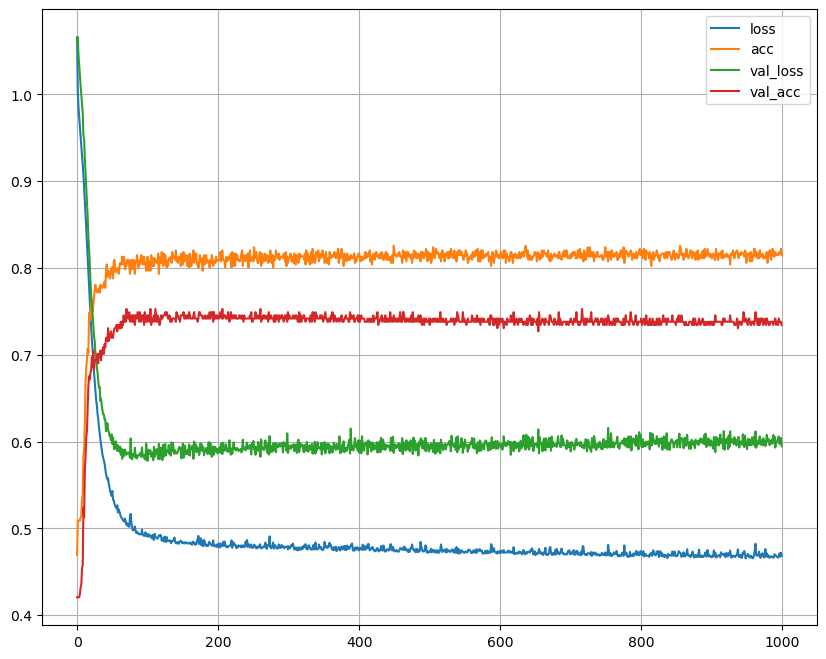

In [48]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [49]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.5945996046066284
Validation accuracy: 0.7343173623085022


## Problem 1
Increase the number of features to include "F3" and "F4" and rerun the experiments. Try also adding the bandwidths ("B1"-"B4").

##### First adding the features F3 and F4 as well

In [53]:
# Getting the features and normalizing
f1f2f3f4 = ["F1", "F2", "F3", "F4"]

x_train_f1f2f3f4 = train[f1f2f3f4]
x_mean_train_f1f2f3f4 = np.mean(x_train_f1f2f3f4)
x_train_f1f2f3f4_norm = x_train_f1f2f3f4 - x_mean_train_f1f2f3f4

x_valid_f1f2f3f4 = valid[f1f2f3f4]
x_mean_valid_f1f2f3f4 = np.mean(x_valid_f1f2f3f4)
x_valid_f1f2f3f4_norm = x_valid_f1f2f3f4 - x_mean_valid_f1f2f3f4

# Create a model with a single hidden layer
model_f1f2f3f4 = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4_norm.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4.summary()

# Train the model
model_f1f2f3f4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
# history_f1f2f3f4 = model_f1f2f3f4.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
#                     epochs=1000, batch_size=32, verbose=True)
history_f1f2f3f4 = model_f1f2f3f4.fit(x_train_f1f2f3f4_norm, y_train, validation_data=(x_valid_f1f2f3f4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               1280      
                                                                 
 dense_15 (Dense)            (None, 3)                 771       
                                                                 
Total params: 2051 (8.01 KB)
Trainable params: 2051 (8.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


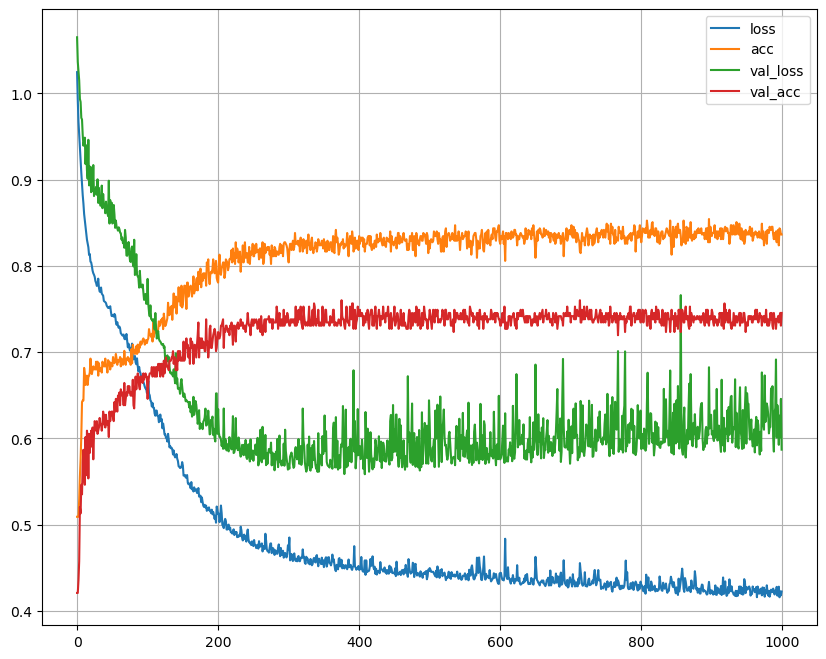

In [54]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history_f1f2f3f4.history['loss'],label='loss')
plt.plot(history_f1f2f3f4.history['accuracy'],label='acc')
plt.plot(history_f1f2f3f4.history['val_loss'],label='val_loss')
plt.plot(history_f1f2f3f4.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [55]:
# Validation model
score_f1f2f3f4 = model_f1f2f3f4.evaluate(x_valid_f1f2f3f4_norm, y_valid, verbose=0)
print('Validation loss:', score_f1f2f3f4[0])
print('Validation accuracy:', score_f1f2f3f4[1])

Validation loss: 0.5868490934371948
Validation accuracy: 0.7453874349594116


##### Running with F1-F4 and B1-B4

In [7]:
f1f2f3f4b1b2b3b4 = ["F1", "F2", "F3", "F4", "B1", "B2", "B3", "B4"]

x_train_f1f2f3f4b1b2b3b4 = train[f1f2f3f4b1b2b3b4]
x_mean_train_f1f2f3f4b1b2b3b4 = np.mean(x_train_f1f2f3f4b1b2b3b4)
x_train_f1f2f3f4b1b2b3b4_norm = x_train_f1f2f3f4b1b2b3b4 - x_mean_train_f1f2f3f4b1b2b3b4

x_valid_f1f2f3f4b1b2b3b4 = valid[f1f2f3f4b1b2b3b4]
x_mean_valid_f1f2f3f4b1b2b3b4 = np.mean(x_valid_f1f2f3f4b1b2b3b4)
x_valid_f1f2f3f4b1b2b3b4_norm = x_valid_f1f2f3f4b1b2b3b4 - x_mean_valid_f1f2f3f4b1b2b3b4

# Create a model with a single hidden layer
model_f1f2f3f4b1b2b3b4 = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train_f1f2f3f4b1b2b3b4_norm.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model_f1f2f3f4b1b2b3b4.summary()

# Train the model
model_f1f2f3f4b1b2b3b4.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Train the model
# history_f1f2f3f4b1b2b3b4 = model_f1f2f3f4b1b2b3b4.fit(x_train_f1f2f3f4b1b2b3b4_norm, y_train, validation_data=(x_valid_f1f2f3f4b1b2b3b4_norm, y_valid),
#                     epochs=1000, batch_size=32, verbose=True)
history_f1f2f3f4b1b2b3b4 = model_f1f2f3f4b1b2b3b4.fit(x_train_f1f2f3f4b1b2b3b4_norm, y_train, validation_data=(x_valid_f1f2f3f4b1b2b3b4_norm, y_valid),
                    epochs=1000, batch_size=32, verbose=0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               2304      
                                                                 
 dense_3 (Dense)             (None, 3)                 771       
                                                                 
Total params: 3075 (12.01 KB)
Trainable params: 3075 (12.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


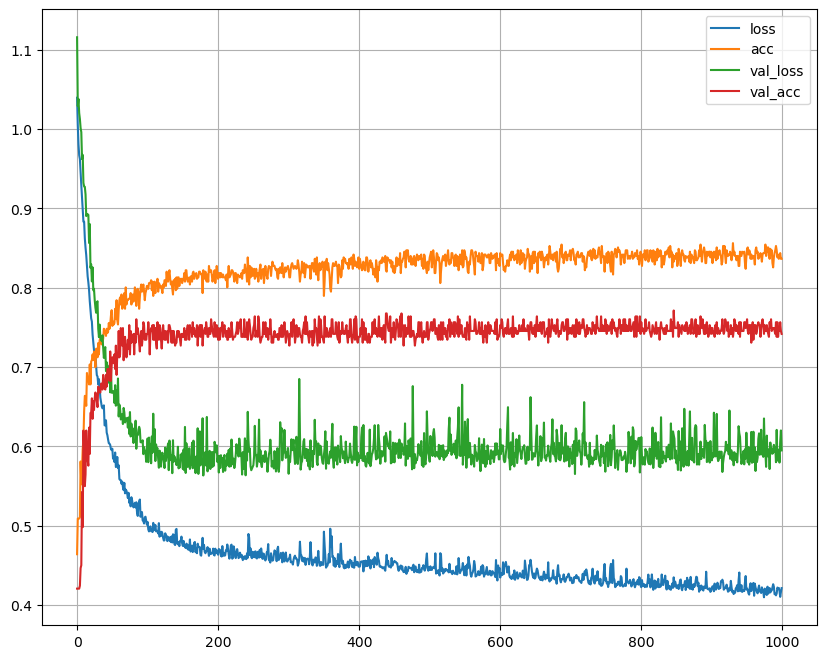

In [8]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history_f1f2f3f4b1b2b3b4.history['loss'],label='loss')
plt.plot(history_f1f2f3f4b1b2b3b4.history['accuracy'],label='acc')
plt.plot(history_f1f2f3f4b1b2b3b4.history['val_loss'],label='val_loss')
plt.plot(history_f1f2f3f4b1b2b3b4.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [11]:
# Validation model
score_f1f2f3f4b1b2b3b4 = model_f1f2f3f4b1b2b3b4.evaluate(x_valid_f1f2f3f4b1b2b3b4_norm, y_valid, verbose=0)
print('Validation loss:', score_f1f2f3f4b1b2b3b4[0])
print('Validation accuracy:', score_f1f2f3f4b1b2b3b4[1])

Validation loss: 0.594873309135437
Validation accuracy: 0.7416974306106567


When using F1-F4 the accuracy goes up from when only using F1-F2. However, when also adding B1-B4 the accuracy goes down. This also occured during exerice 2.

As explained there, the cause for this can be because of the curse of dimensionality. This means that the more features we add, the more data we need to train the model. If we do not have enough data, the model will not be able to generalize well.

## Problem 2
Change the number of nodes in the hidden layer and see how the results change. Try using dropout, and observe the results.

## Problem 3
Add multiple layers to the network and observe the results.

## Problem 4
Use the data to predict the gender of the speaker. Try including the format bandwidths as features as well ("B1"-"B4").